# Linear Regression Tutorial👨🏼‍🏫

The goal of this repository is to explains the assumptions of linear regression in detail. These steps can be applied on other problems to be able to make better decisions about which model to use.

✏️**About Dataset.**

The data used in this study were obtained from the database of Eurostat, which is the statistical office that collects data for the European Union. The analyzed data includes the following European countries (27 countries): Belgium, Bulgaria, Czech Republic, Denmark, Germany, Estonia, Ireland, Greece, Spain, France, Croatia, Italy, Cyprus, Latvia, Lithuania, Luxembourg, Hungary, Malta, Netherlands, Austria, Poland, Portugal, Romania, Slovenia, Slovakia, Finland and Sweden. We note that the study proposes a more varied approach, taking into account different type of countries (developed and under developed), the observed period being from 2011 to 2021.This aspect leads to a large variety of values for the considered variables.

The macroeconomic indicators analyzed in this study are:
- PEC (Primary energy consumption)
- FEC (Final energy consumption).

We are interested in understanding the relationship between the variables involved in the study in order to have a broader view of the described economic context.



✏️**Import the libraries.**

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from scipy.stats import bartlett

✏️**Data.**

The values of the macroeconomic indicators for each country were obtained as the arithmetic mean of the values of these variables in the interval 2011-2021 and were previously processed from the files FEC.xls and PEC.xls. We propose to validate/invalidate the following hypothesis using the linear regression technique.

$\color{red}{\text{Hypothesis: Influence of  PEC on FEC.}}$

The correlation based on hypothesis aims to determine the impact that “Final energy consumption” has on “Primary energy consumption”. 


In [135]:
l_fec=[35.61818181818182, 9.545454545454547, 24.772727272727273, 14.181818181818182, 213.48181818181817, 2.8545454545454545, 11.445454545454547, 16.227272727272723, 82.37272727272726, 146.79090909090908, 6.718181818181818, 115.62727272727274, 1.763636363636364, 3.963636363636364, 5.172727272727273, 4.136363636363637, 17.699999999999996, 0.5909090909090909, 49.42727272727273, 27.572727272727274, 68.06363636363636, 16.227272727272727, 22.981818181818184, 4.818181818181818, 10.672727272727274, 24.881818181818186, 31.845454545454547]
l_pec=[47.33636363636363, 17.87272727272727, 39.80909090909091, 17.10909090909091, 290.79090909090905, 5.254545454545455, 13.954545454545457, 23.09090909090909, 118.06363636363635, 237.96363636363637, 8.127272727272727, 148.20000000000002, 2.4000000000000004, 4.427272727272728, 6.090909090909091, 4.281818181818182, 23.754545454545454, 0.8363636363636364, 63.99090909090909, 31.700000000000003, 96.5, 21.345454545454547, 31.818181818181817, 6.572727272727272, 15.654545454545454, 32.17272727272727, 45.57272727272727]
l_name=['BE','BG','CZ','DK','DE','EE','IE','EL','ES','FR','HR','IT','CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE']
x=np.array(l_pec)#independent variable
y=np.array(l_fec)#dependent variable

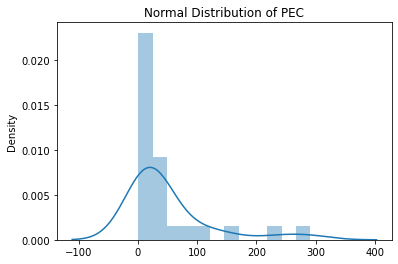

In [136]:
sns.distplot(x,kde=True)
plt.title('Normal Distribution of PEC')
plt.show()

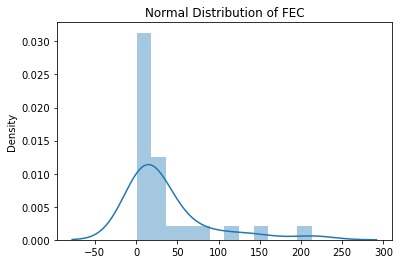

In [137]:
sns.distplot(y,kde=True)
plt.title('Normal Distribution of FEC')
plt.show()

Standardization is useful in cases where the data follows a Gaussian (or normal) distribution. StandardScaler causes the mean of the distribution to be 0. About 68% of the values ​​will lie between -1 and 1. Regression algorithms benefit from normally distributed data with small sample sizes.

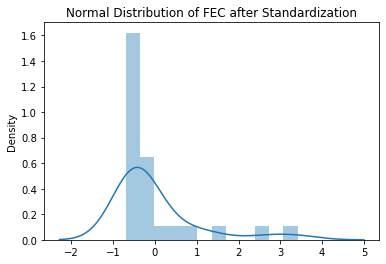

In [138]:
x=np.array(l_pec).reshape(-1, 1)
sc = StandardScaler()
X = sc.fit_transform(x)
sns.distplot(X,kde=True)
plt.title('Normal Distribution of FEC after Standardization')
plt.show()

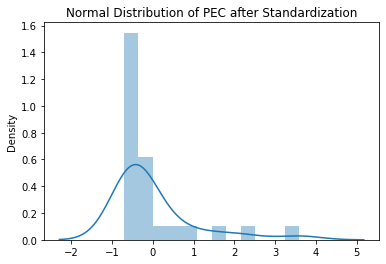

In [139]:
y=np.array(l_fec).reshape(-1, 1)
sc = StandardScaler()
y = sc.fit_transform(y)
sns.distplot(y,kde=True)
plt.title('Normal Distribution of PEC after Standardization')
plt.show()

✏️**Assumptions for Linear Regression.**

**1.Linearity.**

There exists a linear relationship between the independent variable, x, and the dependent variable, y. We can test the linearity relationship in two ways:

- Scatter plot.

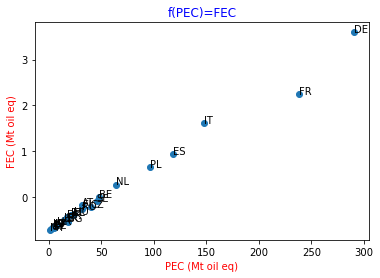

In [140]:
plt.scatter(x,y)
for i, txt in enumerate(l_name):
    plt.annotate(txt, (x[i],y[i]))
plt.xlabel("PEC (Mt oil eq)",color="red")
plt.ylabel("FEC (Mt oil eq)",color="red")
plt.title("f(PEC)=FEC",color="blue")
plt.show()

- Correlation heatmap.

Another way to quantify the linear relationship is to use the Pearson correlation coefficient, which is a measure of the linear association between two variables. It has a value between -1 and 1 where:
- 1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- -1 indicates a perfectly positive linear correlation between two variables


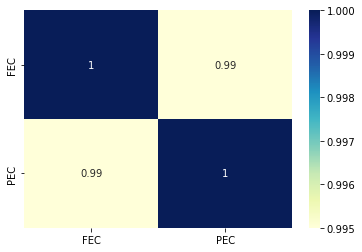

In [141]:
data={
    'FEC':l_fec,
    'PEC':l_pec      
    }
dataframe=pd.DataFrame(data,columns=['FEC','PEC'])
matrix=round(dataframe.corr(),3)
axis_corr = sns.heatmap(
matrix,cmap="YlGnBu", annot=True);
plt.show()

We notice that there is a close relationship of linearity between the two variables both from the scatter plot and from the value of the Pearson correlation coefficient having a high value (0.99).

**Fitting the linear model.**

Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_train)

The train_test_split() method is used to split our data into train and test sets. The dataframe gets divided into X_train, X_test, y_train, and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. 
- train set: the training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.
- test set: the test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions.

**Evaluation of the model.**

In [143]:
print('MSE: {}'.format(mean_squared_error(y_train, y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))
print("R squared: {}".format(r2_score(y_train,y_pred)))

MSE: 0.011092338441137554
RMSE: 0.10532017110286877
R squared: 0.9900005497371727


**2. Mean of Residuals.**

The residuals are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero or very close to zero.

In [144]:
residuals = y_train-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))


Mean of Residuals -4.787836793695988e-17


The obtained value is very close to 0, so we can validate this hypothesis.

**3. Check for Homoscedasticity.**

Homoscedasticity means that the residuals have equal or nearly equal variance on the regression line. In other words, as the value of the dependent variable changes, the error term does not vary much. On the other hand, heteroscedasticity refers to situations where the variance of the residuals is unequal over a range of measured values. 

- Graphical Method: One way to detect heteroscedasticity is by creating a residual diagram in which we plot the residuals corresponding to the output variable. If there is an obvious pattern (like linear or quadratic or funnel shaped) in the plot, then heteroscedasticity is present.

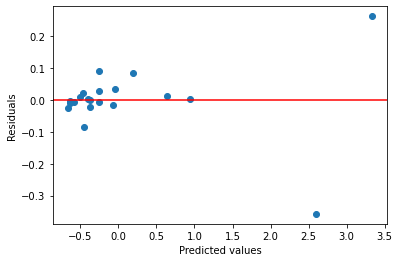

In [145]:
plt.scatter(y_pred,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0,color='r')
plt.show()

At a quick analysis of the graph, it would seem that the variance of the residuals is unequal over a range of measured values.

- Application of tests


Goldfeld Quandt Test is used to detect the presence of heteroscedasticity in a regression model.

- Null Hypothesis: Heteroscedasticity is not present.
- Alternative Hypothesis: Heteroscedasticity is present.

In [146]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
print(lzip(name, test))

[('F statistic', 12.662054085282476), ('p-value', 0.0004145650565976577)]


A p-value less than or equal to your significance level (typically ≤ 0.05) is statistically significant. For instance, if p ≤ 0.05, we will reject the null hypothesis. Therefore, we reject the null hypothesis and accept the alternative hypothesis. A p-value more than the significance level (typically p > 0.05) is not statistically significant and indicates strong evidence for the null hypothesis.
This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis; we can only reject it or fail to reject it.

❗️❗️❗️ When the p-value is above our threshold of significance it does not mean that there is a 95% probability that the alternative hypothesis is true.

Since p value is less than 0.05 in Goldfeld Quandt Test, we reject the null hypothesis and accept the alternative hypothesis. Therefore, heteroscedasticity is present. Considering that this assumption is violated, we will apply a non-linear transformation to the independent and dependent variable.

**We apply the power transformation for our model.**

In [147]:
X_log = np.log(np.array(l_pec).reshape(-1,1))
y_log =np.log(np.array(l_fec))
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.25, random_state=0)
reg_log= LinearRegression()
reg_log.fit(X_train_log,Y_train_log)
y_pred_log= reg_log.predict(X_train_log)

**-Evaluation of the new model.**

In [148]:
print('MSE: {}'.format(mean_squared_error(Y_train_log, y_pred_log)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(Y_train_log, y_pred_log))))
print("R squared: {}".format(r2_score(Y_train_log, y_pred_log)))


MSE: 0.012542675633518218
RMSE: 0.1119940874935736
R squared: 0.9909972764570526


 **-Mean of Residuals for the new model.**

In [149]:
residuals = Y_train_log-y_pred_log
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -4.940492459581947e-16


**-Check for Homoscedasticity for the new model.**

**A) Graphical Method.**

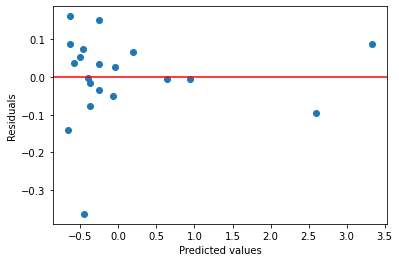

In [150]:
plt.scatter(y_pred,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0,color='r')
plt.show()

**B) Goldfeld Quandt Test.**

In [151]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train_log)
print(lzip(name, test))

[('F statistic', 0.46773716525684983), ('p-value', 0.8634754401644398)]


Since p value is more than 0.05 in Goldfeld Quandt Test, we cannot reject null hypothesis (Heteroscedasticity is not present) and accept the alternative hypothesis.

**C) Bartlett Test.**

Bartlett Test is a statistical test that is used to determine whether or not the variances between several groups are equal.

- Null Hypothesis: The variance among each group is equal.
- Alternative Hypothesis: At least one group has a variance that is not equal to the rest.

If the p-value  is less than some significance level (like $\alpha$ = 0.05) then we can reject the null hypothesis and conclude that not all groups have the same variance.

In [152]:
print(bartlett( X_train_log.flatten(),residuals))

BartlettResult(statistic=63.489276938899955, pvalue=1.612421593614071e-15)


Since p value is less than 0.05, the Null Hypothesis is rejceted and conclude that not all groups have the same variance. This aspect is not a good one for our model.

**-Check for Normality of error terms/residuals.**

The residuals of the model are normally distributed.

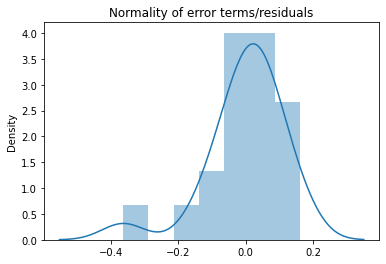

In [153]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

We note that, the residual terms are pretty much normally distributed for the new model.

**-No autocorrelation of residuals.**

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the output variable that shows up in the error terms. Durbin-Watson test is used to detect the presence of autocorrelation in the residuals of a regression. The Durbin-Watson test uses the following hypotheses:

- Null hypothesis: There is no correlation among the residuals.
- Alternative hypothesis: The residuals are autocorrelated.

The test statistic always ranges from 0 to 4. In general, if the test value is less than 1.5 or greater than 2.5, then there is potentially a serious autocorrelation problem. Otherwise, if the test value is between 1.5 and 2.5, then autocorrelation is not a cause for concern.

In [154]:
x_log = np.log(np.array(l_pec).reshape(-1,1))
y_log =np.log(np.array(l_fec))
model = sm.OLS(y_log, x_log).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              8916.
Date:                Tue, 23 May 2023   Prob (F-statistic):                    1.65e-34
Time:                        13:48:48   Log-Likelihood:                          10.127
No. Observations:                  27   AIC:                                     -18.25
Df Residuals:                      26   BIC:                                     -16.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In our case, the value of  Durbin-Watson test is 2.254. Hence, autocorrelation is not a cause for concern.

**$\color{red}{\text{Conclusions.}}$**


Most of the major assumptions of Linear Regression are successfully through for the power model (log-log model).